# Inaugural Project

Import and set magics:

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters:

**Firstly, we have defined all the variables and equations given in the assignment.**


In [89]:
#preferences
alpha = 1/3
beta = 2/3

# p2 is the numeraire
p2 = 1

#endowment
omega1A = 0.8 
omega2A = 0.3
omega1B = 1 - omega1A
omega2B = 1 - omega2A

#total endowment
omega1bar = 1.0
omega2bar = 1.0


def omega1B(omega1A):
    return 1 - omega1A

def omega2B(omega2A):
    return 1 - omega2A

#utility functions
def utility_A(x1A, x2A, alpha):
    return x1A**alpha * x2A**(1-alpha)

def utility_B(x1B, x2B, beta):
    return x1B**beta * x2B**(1-beta)

#demand functions
def x1A(p1, p2, omega1A, omega2A):
    return alpha * ((p1 * omega1A + p2 * omega2A)/p1)

def x2A(p1, p2, omega1A, omega2A):
    return (1-alpha)*((p1 * omega1A + p2 * omega2A)/p2)

def x1B(p1, p2, omega1B, omega2B):
    return beta*((p1*omega1B + p2*omega2B)/p1)

def x2B(p1, p2, omega1B, omega2B):
    return (1-beta)*((p1 * omega1B + p2 * omega2B)/p2)

#market clearing
def check_market_clearing1(alpha, p1, p2, omega1A, omega1B):
    return np.isclose(x1A(p1, p2, omega1A, omega2A) + x1B(p1, p2, omega1B, omega2B), omega1A + omega1B)
def check_market_clearing2(beta, p1, p2, omega2A, omega2B):
    return np.isclose(x2A(p1, p2, omega1A, omega2A) + x2B(p1, p2, omega1B, omega2B), omega2A + omega2B)

def eps1(p1, p2, x1A, omega1A, x1B, omega1B):
    return x1A(p1, p2, omega1A, omega2A) - omega1A + x1B(p1, p2, omega1B, omega2B) - omega1B
def eps2(p1,p2, x2A, omega2A, x2B, omega2B):
    return x2A(p1, p2, omega1A, omega2A) - omega2A + x2B(p1, p2, omega1B, omega2B) - omega2B
  
omega2A = 0.3

# Question 1

**In this code we have presented the indifference curves in the Edgeworth box and the area, where both of the consumers can improve their utility.**

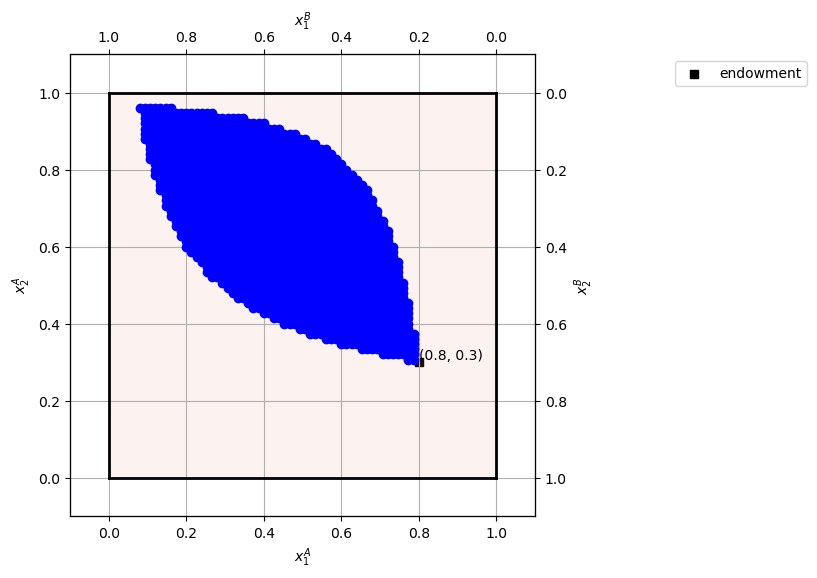

In [90]:
# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()


# A
ax_A.scatter(omega1A,omega2A,marker='s',color='black',label='endowment')
ax_A.text(omega1A, omega2A, f'({omega1A}, {omega2A})', verticalalignment='bottom')

# Defining range for xA1 and xA2
N = 75
x1A_range = np.linspace(0, 1, N+1)
x2A_range = np.linspace(0, 1, N+1)

# Finding combinations that satisfy the conditions
satisfying_combinations = []
for x1A in x1A_range:
    for x2A in x2A_range:
        if utility_A(x1A, x2A, alpha) >= utility_A(omega1A, omega2A, alpha) and utility_B(1 - x1A, 1 - x2A, beta) >= utility_B(1 - omega1A, 1 - omega2A, beta):
            satisfying_combinations.append((1 - x1A, 1 - x2A)) # Convert to B's coordinates

# Extracting x1B and x2B for plotting
x1B_values, x2B_values = zip(*satisfying_combinations)

# Plot satisfying combinations
ax_B.scatter(x1B_values, x2B_values, marker='o', color = 'blue', label='Satisfying Combinations')

# limits
ax_A.plot([0,omega1bar],[0,0],lw=2,color='black')
ax_A.plot([0,omega1bar],[omega2bar,omega2bar],lw=2,color='black')
ax_A.plot([0,0],[0,omega2bar],lw=2,color='black')
ax_A.plot([omega1bar,omega1bar],[0,omega2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, omega1bar + 0.1])
ax_A.set_ylim([-0.1, omega2bar + 0.1])    
ax_B.set_xlim([omega1bar + 0.1, -0.1])
ax_B.set_ylim([omega2bar + 0.1, -0.1])

# Mesh
x = np.linspace(0, omega1bar, 10)
y = np.linspace(0, omega2bar, 10)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

ax_A.contourf(X, Y, Z, 20, cmap='RdGy', alpha=0.1)

# Scale
ax_A.set_xticks(np.arange(0, omega1bar+0.1, 0.2))
ax_A.set_yticks(np.arange(0, omega2bar+0.1, 0.2))
ax_B.set_xticks(np.arange(0, omega1bar+0.1, 0.2))
ax_B.set_yticks(np.arange(0, omega2bar+0.1, 0.2))

ax_A.grid(True)

ax_A.set_xlim([-0.1, omega1bar + 0.1])
ax_A.set_ylim([-0.1, omega2bar + 0.1])    
ax_B.set_xlim([omega1bar + 0.1, -0.1])
ax_B.set_ylim([omega2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()

# Question 2

**We calculated the error in the market clearing price condition s.**

Best p1: 0.93
Minimum absolute error: 0.01


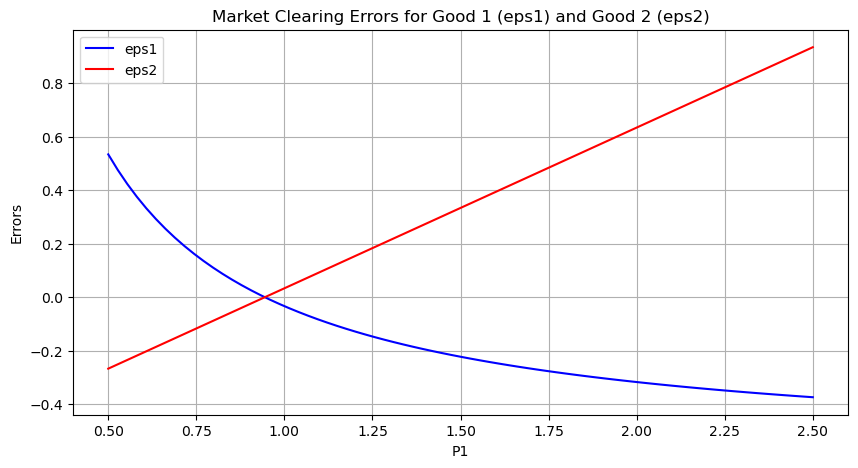

In [103]:
# Price range
P1 = np.linspace(0.5, 2.5, 75)  # P1 price range

def demand_A(p1, omega1A=omega1A, omega2A=omega2A, alpha=alpha, p2=p2):
    budget = omega1A * p1 + omega2A * p2
    x1A_star = alpha * budget / p1
    x2A_star = (1 - alpha) * budget / p2
    return x1A_star, x2A_star

def demand_B(p1, omega1A=omega1A, omega2A=omega2A, beta=beta, p2=p2):
    omega1B = 1 - omega1A
    omega2B = 1 - omega2A
    budget = omega1B * p1 + omega2B * p2
    x1B_star = beta * budget / p1
    x2B_star = (1 - beta) * budget / p2
    return x1B_star, x2B_star

errors = []
for p1 in P1:
    x1A, x2A = demand_A(p1)
    x1B, x2B = demand_B(p1)
    eps1 = x1A + x1B - 1  # Market clearing error for good 1
    eps2 = x2A + x2B - 1  # Market clearing error for good 2
    errors.append((eps1, eps2))

abs_errors = [abs(eps1) + abs(eps2) for eps1, eps2 in errors]
min_error_index = np.argmin(abs_errors)
best_p1 = P1[min_error_index]

# Print results with 2 decimal places
print(f"Best p1: {best_p1:.2f}")
print(f"Minimum absolute error: {abs_errors[min_error_index]:.2f}")

# Extract eps1 and eps2
eps1_vals, eps2_vals = zip(*errors)

# Plotting eps1 and eps2
plt.figure(figsize=(10, 5))
plt.plot(P1, eps1_vals, label='eps1', color='blue')
plt.plot(P1, eps2_vals, label='eps2', color='red')
plt.xlabel('P1')
plt.ylabel('Errors')
plt.title('Market Clearing Errors for Good 1 (eps1) and Good 2 (eps2)')
plt.legend()
plt.grid(True)
plt.show()


# Question 3

**In this task we are calculating the market clearing price, knowing that p2 is equal to 1. We are optimizing customer A's utility function and finding his optimal consumption of both goods. From the optimal consumpion of customer A, we find the market clearing price.**

In [108]:
# Market clearing error function
def market_clearing_error(p1, omega1A, omega1B, omega2A, omega2B):
    x1A_demand = x1A(p1, p2, omega1A, omega2A)
    x1B_demand = x1B(p1, p2, omega1B, omega2B)
    x2A_demand = x2A(p1, p2, omega1A, omega2A)
    x2B_demand = x2B(p1, p2, omega1B, omega2B)

    eps1 = x1A_demand + x1B_demand - (omega1A + omega1B)  # Market clearing error for good 1
    eps2 = x2A_demand + x2B_demand - (omega2A + omega2B)  # Market clearing error for good 2

    return abs(eps1) + abs(eps2)

# Initial guess for price p1
initial_guess_p1 = 1

# Optimization problem to find the price that minimizes the market clearing error
result = minimize(market_clearing_error, initial_guess_p1, args=(omega1A, omega1B, omega2A, omega2B), bounds=[(0.01, 10)])

# Extracting the equilibrium price for good 1
equilibrium_price_p1 = result.x[0]

# Calculate the optimal consumption for A and B
x1A_optimal = x1A(equilibrium_price_p1, p2, omega1A, omega2A)
x2A_optimal = x2A(equilibrium_price_p1, p2, omega1A, omega2A)
x1B_optimal = x1B(equilibrium_price_p1, p2, omega1B, omega2B)
x2B_optimal = x2B(equilibrium_price_p1, p2, omega1B, omega2B)

# Printing the results with 2 decimal places
print(f"Market clearing price p1: {equilibrium_price_p1:.2f}")
print(f"Market clearing price p2: {p2:.2f}")
print(f"Optimal consumption for A: x1A = {x1A_optimal:.2f}, x2A = {x2A_optimal:.2f}")
print(f"Optimal consumption for B: x1B = {x1B_optimal:.2f}, x2B = {x2B_optimal:.2f}")


Market clearing price p1: 0.94
Market clearing price p2: 1.00
Optimal consumption for A: x1A = 0.37, x2A = 0.70
Optimal consumption for B: x1B = 0.63, x2B = 0.30


# Question 4

**Part A:** finding the allocation of consumption if price 1 (p1) belongs to set P1 and consumer A is chosing the price to maximize their own utility functions

In [93]:
# Price range
P1 = np.linspace(0.5, 2.5, 75)

# Function to calculate A's utility given a price p1
def utility_A_given_p1(p1):
    x1B = x1B_demand(p1, p2, omega1B, omega2B)
    x2B = x2B_demand(p1, p2, omega1B, omega2B)
    
    x1A = 1 - x1B
    x2A = 1 - x2B
    
    return utility_A(x1A, x2A, alpha)

# Loop over price vector to find the price that maximizes A's utility
max_utility = -np.inf
best_p1 = None

for p1 in P1:
    current_utility = utility_A_given_p1(p1)
    if current_utility > max_utility:
        max_utility = current_utility
        best_p1 = p1

# Calculate the optimal allocation for A and B at the optimal price
optimal_p1 = best_p1
x1B_optimal = x1B_demand(optimal_p1, p2, omega1B, omega2B)
x2B_optimal = x2B_demand(optimal_p1, p2, omega1B, omega2B)

x1A_optimal = 1 - x1B_optimal
x2A_optimal = 1 - x2B_optimal

# Print results with 2 decimal places
print("Optimal price for A: {:.2f}".format(optimal_p1))
print("Optimal consumption for A (x1A, x2A): ({:.2f}, {:.2f})".format(x1A_optimal, x2A_optimal))
print("Optimal consumption for B (x1B, x2B): ({:.2f}, {:.2f})".format(x1B_optimal, x2B_optimal))
print("Maximum utility for A: {:.2f}".format(max_utility))

Optimal price for A: 1.91
Optimal consumption for A (x1A, x2A): (0.62, 0.64)
Optimal consumption for B (x1B, x2B): (0.38, 0.36)
Maximum utility for A: 0.63


/var/folders/6y/310dzt4d7bg099w9sbh0rx7m0000gn/T/ipykernel_65453/1632711964.py:13: RuntimeWarning: invalid value encountered in scalar power
  return x1A**alpha * x2A**(1-alpha)


We know that this might be wrong, we couldn't find the error in the code, but the result doesn't look correct.

**Part B:** finding the allocation for of consumption for consumers A & B when consumer A chooses prices to maximize her own utility but the price is not restricted and should only be positive. 

In [94]:
# Objective function to maximize
def objective(p1):
    x1B = beta * (omega1B + omega2B / p1)
    x2B = (1 - beta) * (omega1B * p1 + omega2B)
    x1A = 1 - x1B
    x2A = 1 - x2B
    return -utility_A(x1A, x2A, alpha)  

# p1 is positive
constraint = ({'type': 'ineq', 'fun': lambda p1: p1 - 0.001})  

# Initial guess
initial_guess = 1.0

# Optimization
result = minimize(objective, initial_guess, constraints=constraint)

# Optimal solution
optimal_p1 = result.x[0]
x1B_optimal = beta * (omega1B + omega2B / optimal_p1)
x2B_optimal = (1 - beta) * (omega1B * optimal_p1 + omega2B)
x1A_optimal = 1 - x1B_optimal
x2A_optimal = 1 - x2B_optimal
max_utility = -result.fun  

# Print results with 2 decimal places
print(f"Optimal price p1 is: {optimal_p1:.2f}")
print(f"Maximal utility of A is: {max_utility:.2f}")
print(f"Optimal allocation for A: x1A = {x1A_optimal:.2f}, x2A = {x2A_optimal:.2f}")
print(f"Optimal allocation for B: x1B = {x1B_optimal:.2f}, x2B = {x2B_optimal:.2f}")


Optimal price p1 is: 1.90
Maximal utility of A is: 0.63
Optimal allocation for A: x1A = 0.62, x2A = 0.64
Optimal allocation for B: x1B = 0.38, x2B = 0.36


# Question 5

**Now, we are assuming that customer A is a market maker, and therefore she chooses customer B's consumption.**

**Part A:** We are finding the allocation in consumption when the choice set for goods is limited to C.

In [116]:
# Grid search parameters
N = 75
x1A_range = np.linspace(0, 1, N+1)
x2A_range = np.linspace(0, 1, N+1)

# Initial endowment utilities
initial_utility_A = utility_A(omega1A, omega2A)
initial_utility_B = utility_B(omega1B, omega2B)

# Maximum utility for A and corresponding allocation
max_utility_A = -np.inf
optimal_allocation_A = (None, None)
optimal_allocation_B = (None, None)

# Grid search
for x1A in x1A_range:
    for x2A in x2A_range:
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        if utility_B(x1B, x2B) >= initial_utility_B:
            current_utility_A = utility_A(x1A, x2A)
            if current_utility_A > max_utility_A:
                max_utility_A = current_utility_A
                optimal_allocation_A = (x1A, x2A)
                optimal_allocation_B = (x1B, x2B)

# Output the results
print("Optimal allocation for A (x1A, x2A): ({:.2f}, {:.2f})".format(optimal_allocation_A[0], optimal_allocation_A[1]))
print("Optimal allocation for B (x1B, x2B): ({:.2f}, {:.2f})".format(optimal_allocation_B[0], optimal_allocation_B[1]))
print("Maximum utility for A: {:.2f}".format(max_utility_A))


Optimal allocation for A (x1A, x2A): (0.56, 0.85)
Optimal allocation for B (x1B, x2B): (0.44, 0.15)
Maximum utility for A: 0.74


**Part B**: We are finding the allocation consumption when there are no restrictions imposed

In [165]:
# Constraint for B's utility not being worse off
def constraint(x):
    x1A, x2A = x
    x1B, x2B = 1 - x1A, 1 - x2A
    return utility_B(x1B, x2B, beta) - utility_B(omega1B, omega2B, beta)

# Generate random initial guesses from a normal distribution
def generate_initial_guesses(mean, std, num_guesses, bounds):
    initial_guesses = []
    for _ in range(num_guesses):
        guess = np.random.normal(mean, std, 2)
        # Ensure the guesses are within the bounds
        guess = np.clip(guess, bounds[0][0], bounds[0][1])
        initial_guesses.append(guess)
    return initial_guesses

# Defining bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Generate 10 random initial guesses
mean = 0.5
std = 0.2
num_guesses = 10
initial_guesses = generate_initial_guesses(mean, std, num_guesses, bounds)

# Best result initialization
best_result = None
best_utility_A = -np.inf

# Running the solver with different initial guesses
for x0 in initial_guesses:
    optimization_result = minimize(lambda x: -utility_A(x[0], x[1], alpha), x0, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint})
    
    if optimization_result.success:
        current_utility_A = -optimization_result.fun
        if current_utility_A > best_utility_A:
            best_utility_A = current_utility_A
            best_result = optimization_result

# Extracting the optimal allocation
optimal_allocation_A = best_result.x
optimal_allocation_B = [1 - x for x in optimal_allocation_A]

# Printing the results with reduced decimals
print(f"Optimal consumption for A (x1A, x2A): ({optimal_allocation_A[0]:.2f}, {optimal_allocation_A[1]:.2f})")
print(f"Optimal consumption for B (x1B, x2B): ({optimal_allocation_B[0]:.2f}, {optimal_allocation_B[1]:.2f})")
print(f"Maximum utility for A: {best_utility_A:.2f}")

# Calculate the maximal utility for player B
max_utility_B = utility_B(omega1B, omega2B, beta)
print(f"Max Utility for Player B: {max_utility_B:.2f}")

Optimal consumption for A (x1A, x2A): (0.58, 0.84)
Optimal consumption for B (x1B, x2B): (0.42, 0.16)
Maximum utility for A: 0.74
Max Utility for Player B: 0.30


# Question 6

**Part A:** In this task we are trying to find an allocation of both goods for consumers A and B under the assumption that consumptions are chosen by a social planner.

In [171]:

# Defining the objective function to maximize
def objective(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(utility_A(xA1, xA2) + utility_B(xB1, xB2))  # We want to maximize aggregate utility

# Defining the constraints (consumption must be within [0, 1])
constraint = ({'type': 'ineq', 'fun': lambda x: x[0]},       # xA1 >= 0
              {'type': 'ineq', 'fun': lambda x: x[1]},       # xA2 >= 0
              {'type': 'ineq', 'fun': lambda x: 1 - x[0]},   # xA1 <= 1
              {'type': 'ineq', 'fun': lambda x: 1 - x[1]})   # xA2 <= 1

# Initial guess for A's consumption
initial_guess = [0.5, 0.5]

# Optimization problem
result = minimize(objective, initial_guess, constraints=constraint)

# Extracting optimal consumption for A and B
xA1_optimal, xA2_optimal = result.x
xB1_optimal = 1 - xA1_optimal
xB2_optimal = 1 - xA2_optimal

# Calculating the total utility
total_utility = -result.fun

# Printing the results with reduced decimals
print(f"Optimal consumption for A: ({xA1_optimal:.2f}, {xA2_optimal:.2f})")
print(f"Optimal consumption for B: ({xB1_optimal:.2f}, {xB2_optimal:.2f})")
print(f"Total utility: {total_utility:.2f}")


Optimal consumption for A: (0.33, 0.67)
Optimal consumption for B: (0.67, 0.33)
Total utility: 1.06


The social planer chooses this allocation because it maximises the society's utility and this is its role.

**Part B:** We drew a plot with the optimal consumption for A according to the maximal aggregate utility 

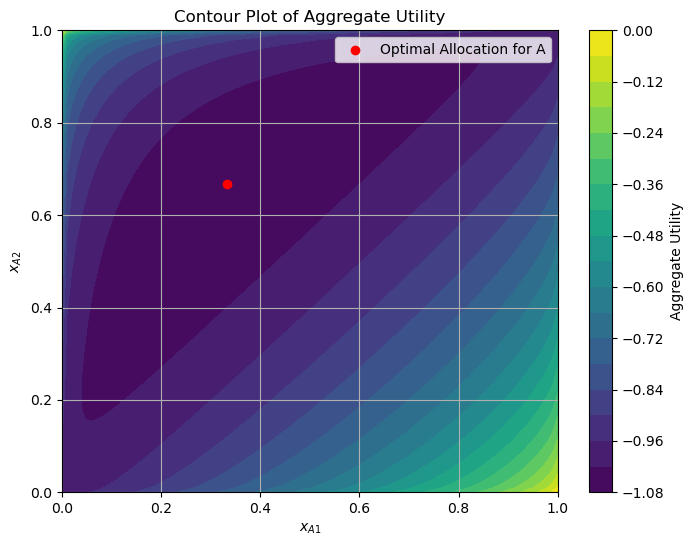

In [111]:
# Creating a contour plot
xA1_values = np.linspace(0, 1, 100)
xA2_values = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xA1_values, xA2_values)
Z = -(u_A(X, Y) + u_B(1 - X, 1 - Y))  # Negative of the total utility to maximize

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Aggregate Utility')
plt.scatter(xA1_optimal, xA2_optimal, color='red', label='Optimal Allocation for A')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Contour Plot of Aggregate Utility')
plt.legend()
plt.grid(True)
plt.show()

In [175]:
# Creating dictionaries for the optimal consumptions

optimal_consumptions = {
    "3)": {"Optimal consumption for A": (0.37, 0.70), "Optimal consumption for B": (0.63, 0.30)},
    "4a)": {"Optimal consumption for A": (0.62, 0.64), "Optimal consumption for B": (0.38, 0.36)},
    "4b)": {"Optimal consumption for A": (0.62, 0.64), "Optimal consumption for B": (0.38, 0.36)},
    "5a)": {"Optimal consumption for A": (0.56, 0.85), "Optimal consumption for B": (0.44, 0.15)},
    "5b)": {"Optimal consumption for A": [0.58, 0.84], "Optimal consumption for B": [0.42, 0.16]},
    "6a)": {"Optimal consumption for A": (0.33, 0.67), "Optimal consumption for B": (0.67, 0.33)}
}

# Finding the maximum length of the keys for alignment
max_key_length = max(len(key) for key in optimal_consumptions)

# Print the table
print(f"| {'Index':<{max_key_length}} | {'Optimal consumption for A':<40} | {'Optimal consumption for B':<40} |")
print(f"|{'-' * (max_key_length + 2)}|{'-' * 42}|{'-' * 42}|")
for index, values in optimal_consumptions.items():
    opt_consumption_A = values.get('Optimal consumption for A', '')
    opt_consumption_B = values.get('Optimal consumption for B', '')
    if isinstance(opt_consumption_A, tuple):
        opt_A_str = f"{opt_consumption_A[0]:.6f}, {opt_consumption_A[1]:.6f}"
    else:
        opt_A_str = ', '.join(f"{x:.6f}" for x in opt_consumption_A)
    if isinstance(opt_consumption_B, tuple):
        opt_B_str = f"{opt_consumption_B[0]:.6f}, {opt_consumption_B[1]:.6f}"
    else:
        opt_B_str = ', '.join(f"{x:.6f}" for x in opt_consumption_B)
    print(f"| {index:<{max_key_length}} | {opt_A_str:<40} | {opt_B_str:<40} |")


| Index | Optimal consumption for A                | Optimal consumption for B                |
|-----|------------------------------------------|------------------------------------------|
| 3)  | 0.370000, 0.700000                       | 0.630000, 0.300000                       |
| 4a) | 0.620000, 0.640000                       | 0.380000, 0.360000                       |
| 4b) | 0.620000, 0.640000                       | 0.380000, 0.360000                       |
| 5a) | 0.560000, 0.850000                       | 0.440000, 0.150000                       |
| 5b) | 0.580000, 0.840000                       | 0.420000, 0.160000                       |
| 6a) | 0.330000, 0.670000                       | 0.670000, 0.330000                       |


In [177]:
# Creating dictionaries for the optimal consumptions
optimal_consumptions = {
    "3)": {"Optimal consumption for A": (0.37, 0.70), "Optimal consumption for B": (0.63, 0.30)},
    "4a)": {"Optimal consumption for A": (0.62, 0.64), "Optimal consumption for B": (0.38, 0.36)},
    "4b)": {"Optimal consumption for A": (0.62, 0.64), "Optimal consumption for B": (0.38, 0.36)},
    "5a)": {"Optimal consumption for A": (0.56, 0.85), "Optimal consumption for B": (0.44, 0.15)},
    "5b)": {"Optimal consumption for A": (0.58, 0.84), "Optimal consumption for B": (0.42, 0.16)},
    "6a)": {"Optimal consumption for A": (0.33, 0.67), "Optimal consumption for B": (0.67, 0.33)}
}

# Finding the maximum length of the keys for alignment
max_key_length = max(len(key) for key in optimal_consumptions)

# Print the table
print(f"| {'Index':<{max_key_length}} | {'Optimal consumption for A':<40} | {'Optimal consumption for B':<40} |")
print(f"|{'-' * (max_key_length + 2)}|{'-' * 42}|{'-' * 42}|")
for index, values in optimal_consumptions.items():
    opt_consumption_A = values.get('Optimal consumption for A', '')
    opt_consumption_B = values.get('Optimal consumption for B', '')
    
    # Formatting optimal consumption for A
    if isinstance(opt_consumption_A, tuple):
        opt_A_str = f"({opt_consumption_A[0]:.2f}, {opt_consumption_A[1]:.2f})"
    else:
        opt_A_str = ', '.join(f"{x:.2f}" for x in opt_consumption_A)
    
    # Formatting optimal consumption for B
    if isinstance(opt_consumption_B, tuple):
        opt_B_str = f"({opt_consumption_B[0]:.2f}, {opt_consumption_B[1]:.2f})"
    else:
        opt_B_str = ', '.join(f"{x:.2f}" for x in opt_consumption_B)
    
    print(f"| {index:<{max_key_length}} | {opt_A_str:<40} | {opt_B_str:<40} |")

| Index | Optimal consumption for A                | Optimal consumption for B                |
|-----|------------------------------------------|------------------------------------------|
| 3)  | (0.37, 0.70)                             | (0.63, 0.30)                             |
| 4a) | (0.62, 0.64)                             | (0.38, 0.36)                             |
| 4b) | (0.62, 0.64)                             | (0.38, 0.36)                             |
| 5a) | (0.56, 0.85)                             | (0.44, 0.15)                             |
| 5b) | (0.58, 0.84)                             | (0.42, 0.16)                             |
| 6a) | (0.33, 0.67)                             | (0.67, 0.33)                             |


# **Discussion**

In the table above, we have presented all the allocations we found. 

We can say that in question 4a A is better off and B worse off because A is maximizing her own utility, under the constraint that p1 must be in the P1 set and p2 must be 1, and does not take into account the utility of B. 

In 4b A is chosing the prices under the constraint that they have to be positive. In that case, A will maximize her utility considering the "best" market price and will, thus, maximize the society's utility.

For question 5a, we noticed that A has a preference for good 2 and B a preference for good 1. Thus, they will trade A's good 1 for B's good 2 so that B is not worse off because she will have more of the good she preferes and so does A for good 2. 

In question 5b, when there is no further restrictions, A will consume a lot more than B so that she maximizes her utility and improves a little bit B's utility. The results between question 5a and 5b are not different because in the first one we search for an allocation within C which represents the set of allocation where A and B will be better off and in the second one we just want to find an allocation where A and B are better off. Hence, these two questions lead to the same answer as 5b's allocation will be within the C set of allocation because it is only in this set that A and B can improve their utility. 

For question 6a, the social planer is trying to maximize the society's utility and will therefore allocate the resources so that the aggregate utility is at its top-level but the individuals utilities are not maximized. 

# Question 7

**Creating a plot of consumer A's 50 random endownments, which follow the uniform distribution.**

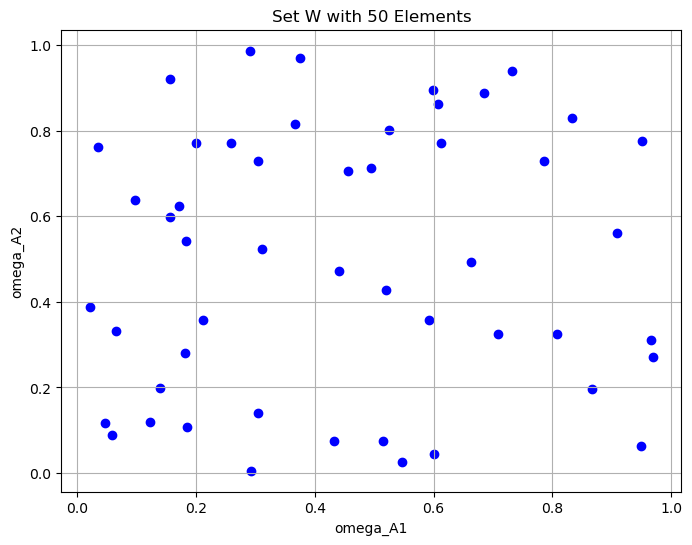

In [181]:
# seed the random number generator for reproducibility:
np.random.seed(42)

# Defining the number of elements
num_elements = 50

# Generating random values for omega_A1 and omega_A2
omega_A1 = np.random.uniform(0, 1, num_elements)
omega_A2 = np.random.uniform(0, 1, num_elements)

# Creating the set W
W = [(omega_A1[i], omega_A2[i]) for i in range(num_elements)]

# Extracting x and y values
x_values = [pair[0] for pair in W]
y_values = [pair[1] for pair in W]

# Plotting the set W
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', marker='o')
plt.title('Set W with 50 Elements')
plt.xlabel('omega_A1')
plt.ylabel('omega_A2')
plt.grid(True)
plt.show()

# Question 8

**We found the market equilibrium allocation for each omegaA in W and plot them in the Edgeworth box.**

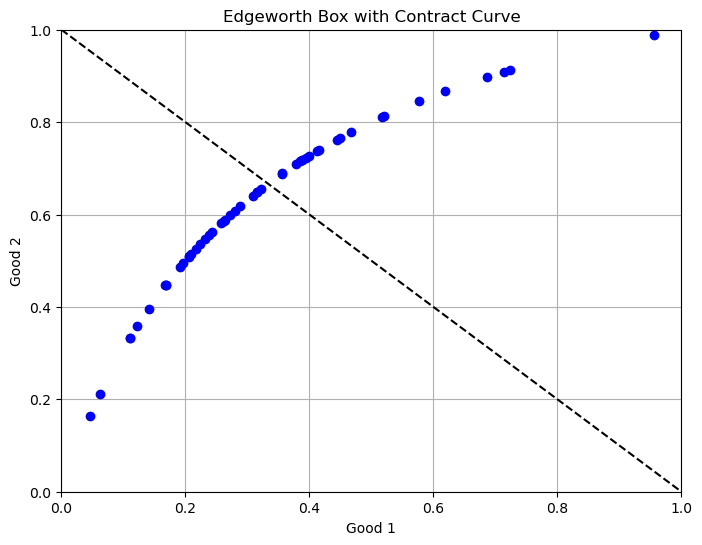

In [219]:
# Market clearing error function
def market_clearing_error(p1, omega1A, omega1B, omega2A, omega2B):
    x1A_demand = x1A(p1, p2, omega1A, omega2A)
    x1B_demand = x1B(p1, p2, omega1B, omega2B)
    x2A_demand = x2A(p1, p2, omega1A, omega2A)
    x2B_demand = x2B(p1, p2, omega1B, omega2B)

    eps1 = x1A_demand + x1B_demand - (omega1A + omega1B)  # Market clearing error for good 1
    eps2 = x2A_demand + x2B_demand - (omega2A + omega2B)  # Market clearing error for good 2

    return abs(eps1) + abs(eps2)

# Function to find the market equilibrium allocation for a given endowment
def find_market_equilibrium(omega1A, omega2A):
    omega1B = 1 - omega1A
    omega2B = 1 - omega2A
   
    initial_guess_p1 = 1  # Initial guess for p1
   
    # Optimization problem to find the price that minimizes the market clearing error
    result = minimize(market_clearing_error, initial_guess_p1, args=(omega1A, omega1B, omega2A, omega2B), bounds=[(0.01, 10)])
   
    # Extracting the equilibrium price for good 1
    equilibrium_price_p1 = result.x[0]
   
    # Calculate the optimal consumption for A and B
    x1A_optimal = x1A(equilibrium_price_p1, p2, omega1A, omega2A)
    x2A_optimal = x2A(equilibrium_price_p1, p2, omega1A, omega2A)
    x1B_optimal = x1B(equilibrium_price_p1, p2, omega1B, omega2B)
    x2B_optimal = x2B(equilibrium_price_p1, p2, omega1B, omega2B)
   
    return (x1A_optimal, x2A_optimal), (x1B_optimal, x2B_optimal)

# Generating random set W
np.random.seed(0)  # For reproducibility
omega_A1_values = np.random.uniform(0, 1, num_elements)
omega_A2_values = np.random.uniform(0, 1, num_elements)
W = [(omega_A1_values[i], omega_A2_values[i]) for i in range(num_elements)]

# Finding market equilibrium allocations for each ωA in W
market_allocations = [find_market_equilibrium(omega1A, omega2A) for omega1A, omega2A in W]

# Extract allocations for A only to form the contract curve
allocations_A = [xA for (xA, xB) in market_allocations]

# Plotting the Edgeworth box with the contract curve
plt.figure(figsize=(8, 6))

# Edgeworth box
plt.plot([0, 1], [1, 0], 'k--')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Edgeworth Box with Contract Curve')

# Plot only market equilibrium allocations for A (blue dots)
for xA in allocations_A:
    plt.plot(xA[0], xA[1], 'bo')  # Consumer A's allocation

plt.grid(True)
plt.show()


# CONLUSION

In this assignment we have considered an exchange economy with two consumers, A and B, and two goods, x1 and x2. We have tryed to present different cases of consumers allocations and see in which case consumers are better off.  

We have found that the best case scenario for consumer A is in question 5b when she is choosing B's consumption there are no restrictions other than B shouldn't be worse off. On the other hand, consumer B has the highest utility in question 6a, when the social planer is choosing the consumption for both consumers in order to maximize the aggregate utility. 